In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string

In [61]:
df = pd.read_csv('spam.csv', encoding='latin1') 

In [62]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
248,ham,It didnt work again oh. Ok goodnight then. I.l...,NaN,NaN,NaN
3901,ham,"Right on brah, see you later",NaN,NaN,NaN
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...,NaN,NaN,NaN
3571,ham,"Yup, leaving right now, be back soon",NaN,NaN,NaN
3630,ham,Thank you princess! You are so sexy...,NaN,NaN,NaN


# DATA CLEANING

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [64]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [66]:
df.rename(columns={'v1':'classification','v2':'text'},inplace=True)

In [67]:
df=df[["text","classification"]]
df

,text,classification
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [68]:
df['classification'] = df['classification'].map({'ham': 0, 'spam': 1})

In [69]:
df

,text,classification
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [70]:
df.isnull().sum()

text              0
classification    0
dtype: int64

In [71]:
df.duplicated().sum()

403

In [72]:
df.drop_duplicates(keep="first",inplace=True)

In [73]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [74]:
df['classification'].value_counts()

0    4516
1     653
Name: classification, dtype: int64

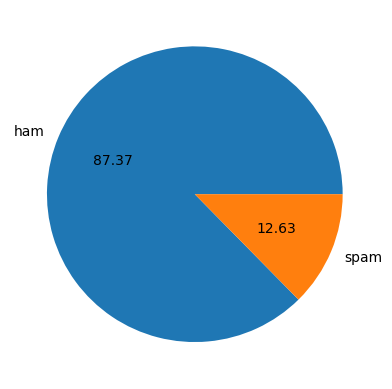

In [75]:
plt.pie(df['classification'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show() #data imbalance

In [76]:
import nltk

In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uthis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Creating new columns (no: of chars,sentences,words) 

In [78]:
df['no_of_chars']= df['text'].apply(len)

In [79]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [80]:
df

,text,classification,no_of_chars,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35
5568,Will Ì_ b going to esplanade fr home?,0,37,9
5569,"Pity, * was in mood for that. So...any other s...",0,57,15
5570,The guy did some bitching but I acted like i'd...,0,125,27


In [81]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [82]:
df

,text,classification,no_of_chars,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


In [83]:
df.head()

,text,classification,no_of_chars,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [84]:
# ham
df[df['classification'] == 0][['no_of_chars','num_words','num_sent']].describe()

,no_of_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [85]:
# spam
df[df['classification'] == 1][['no_of_chars','num_words','num_sent']].describe()

,no_of_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_of_chars', ylabel='Count'>

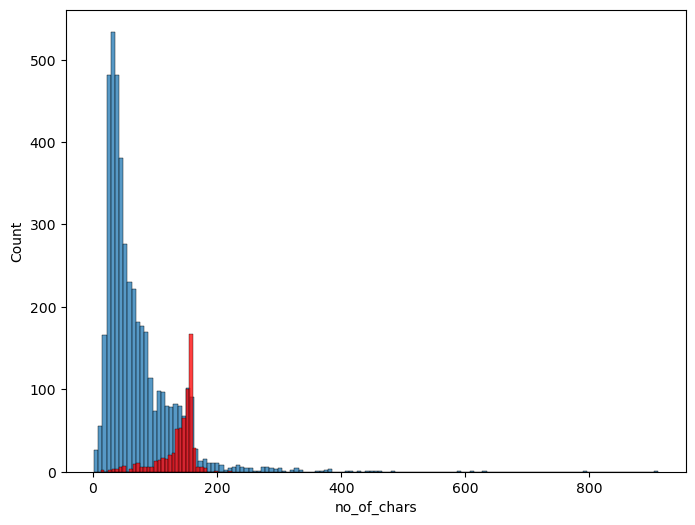

In [86]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['classification'] == 0]['no_of_chars'])
sns.histplot(df[df['classification'] == 1]['no_of_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

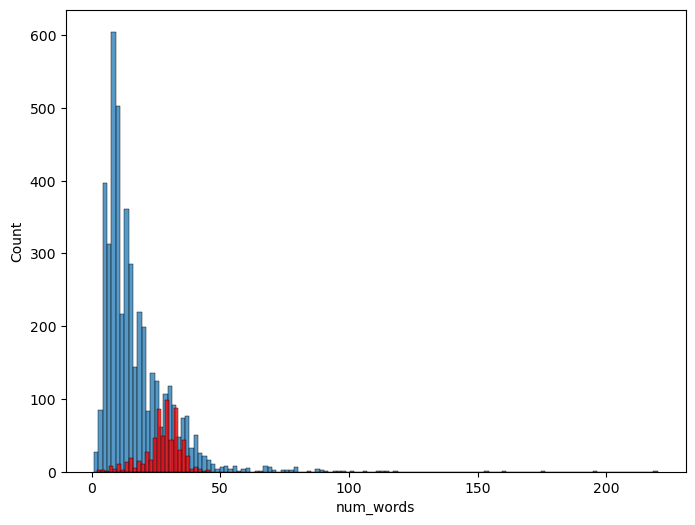

In [87]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['classification'] == 0]['num_words'])
sns.histplot(df[df['classification'] == 1]['num_words'],color='red')

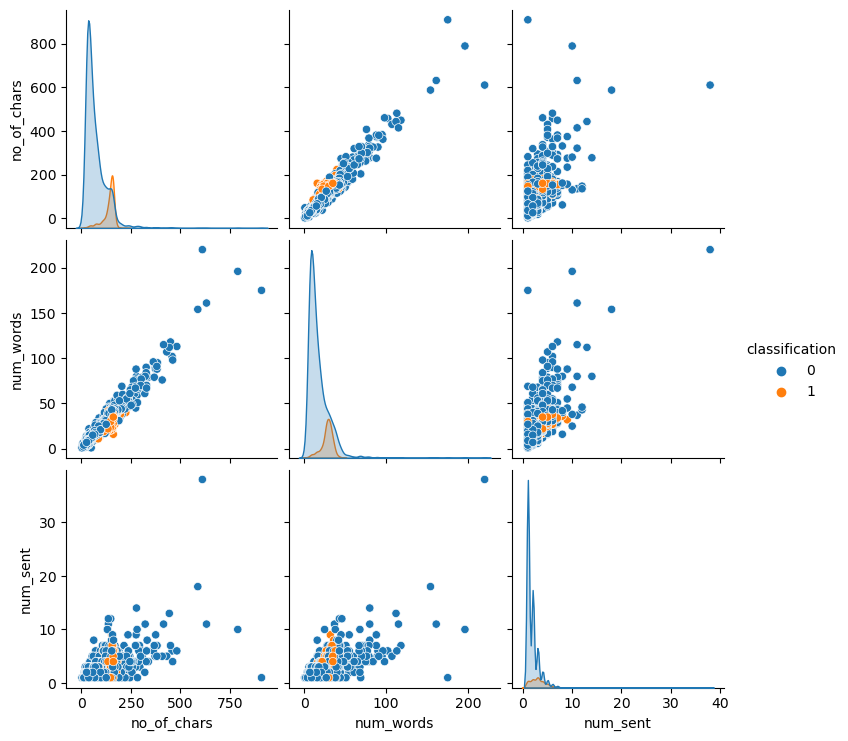

In [88]:
sns.pairplot(df,hue='classification')

In [89]:
df

,text,classification,no_of_chars,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


C:\Users\uthis\AppData\Local\Temp\ipykernel_12048\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

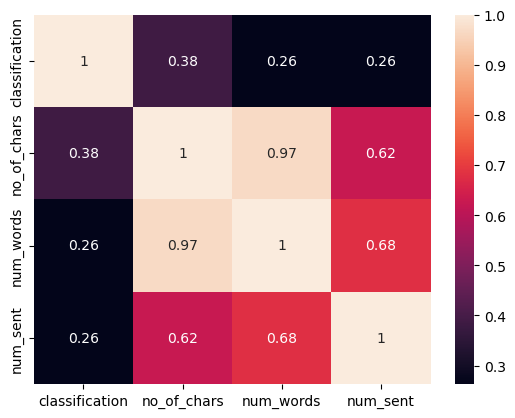

In [90]:
sns.heatmap(df.corr(),annot=True)

In [91]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uthis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [92]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

## Data Preprocessing 

Lower case


Tokenization


Removing special characters


Removing stop words and punctuation

Stemming

In [94]:
def transform_text(text):
    #to lower case
    text=text.lower()
    
    #tokenize
    text = nltk.word_tokenize(text)
    
    #remove special chars
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    #remove stop words(words that does not provide meaning) and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
    text=y[:]
    y.clear()
    return " ".join(text)
transform_text("Hi how are you lecture belting")

'hi lectur belt'

In [95]:
df['transformed_text'] = df['text'].apply(transform_text)

In [96]:
df.head()

,text,classification,no_of_chars,num_words,num_sent,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [97]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [98]:
spam_wc = wc.generate(df[df['classification'] == 1]['transformed_text'].str.cat(sep=" "))

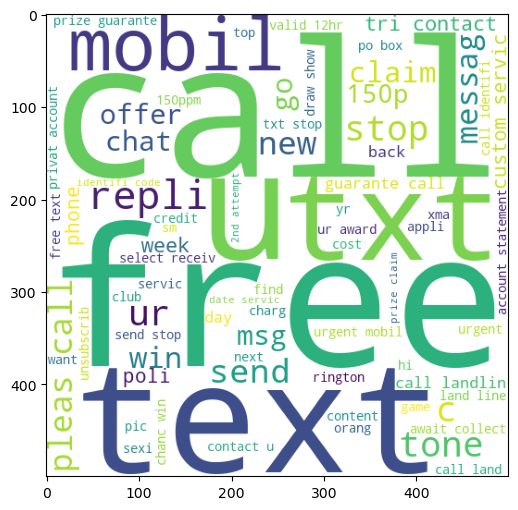

In [99]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [100]:
ham_wc = wc.generate(df[df['classification'] == 0]['transformed_text'].str.cat(sep=" "))

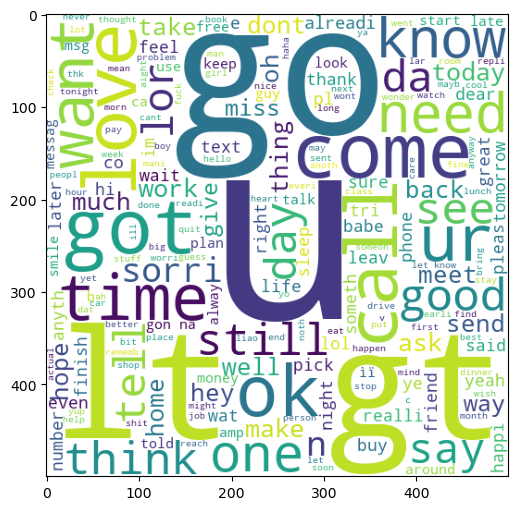

In [101]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [102]:
spam_corpus = []
for msg in df[df['classification'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [103]:
len(spam_corpus)

9939

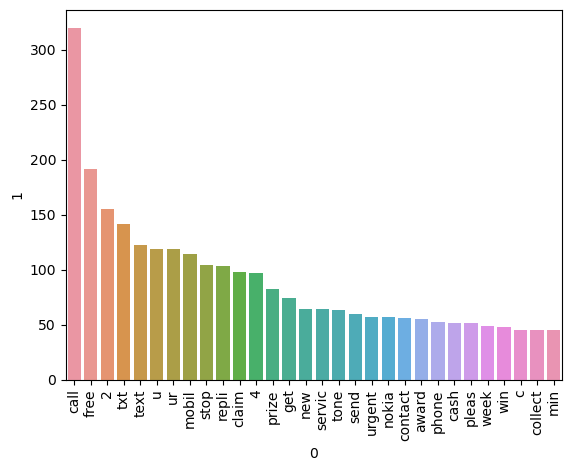

In [104]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [105]:
ham_corpus = []
for msg in df[df['classification'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [106]:
len(ham_corpus)

35404

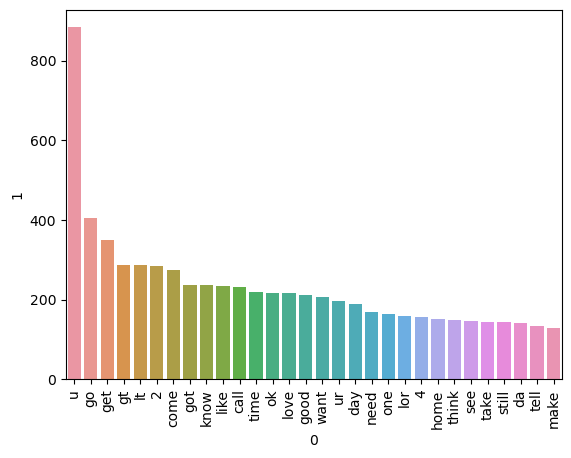

In [107]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building 

In [162]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [109]:
df.head()

,text,classification,no_of_chars,num_words,num_sent,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [166]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [112]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [113]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [114]:
X.shape

(5169, 3000)

In [116]:
y = df['classification'].values

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [119]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [120]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [121]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [122]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [123]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [134]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [135]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [136]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [179]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [138]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [140]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [141]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [142]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [143]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


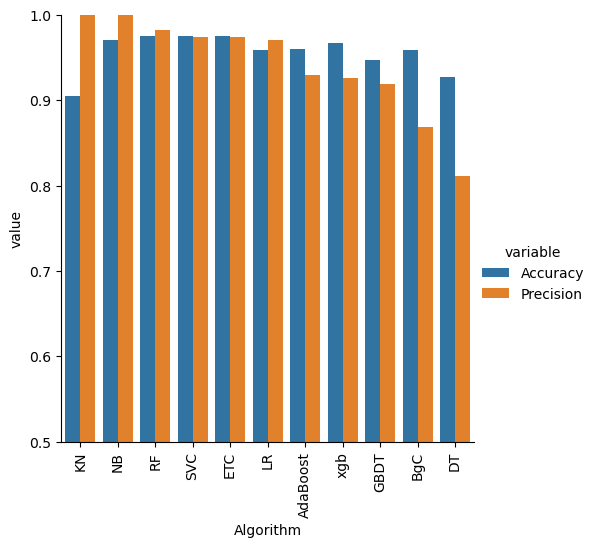

In [144]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [145]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [164]:
[transform_text('HI')]

['hi']

In [168]:
 tfidf.transform([transform_text('HI')]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [190]:
mnb.predict( tfidf.transform([transform_text('our account has been credited with 500 FREE ')]).toarray())[0]

1

In [188]:
df.sample(5)

,text,classification,no_of_chars,num_words,num_sent,transformed_text
1388,Oh k.i think most of wi and nz players unsold.,0,46,11,1,oh think wi nz player unsold
454,"Loan for any purpose å£500 - å£75,000. Homeown...",1,164,33,5,loan purpos homeown tenant welcom previous ref...
3842,Yes ammae....life takes lot of turns you can o...,0,85,19,1,ye amma life take lot turn sit tri hold steer
1491,Your account has been credited with 500 FREE T...,1,130,28,2,account credit 500 free text messag activ txt ...
2329,Am surfing online store. For offers do you wan...,0,65,15,2,surf onlin store offer want buy thing
